# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find top venues nearby. Specifically, this report will be targeted to stakeholders interested in Finding  an **House,or a place to stay** in **Mumbai** , India.

Since there are lots of venues in Mumbai we will try to detect **locations that are not already crowded in nearb**. We are also particularly interested in **areas with no good venues near by **.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of famous venues in the neighborhood (any type of places)
* number of and distance to Other places in the neighborhood, if any

Following data sources will be needed to extract/generate the required information:
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Geocoding**
* number of places and their type and location in every neighborhood will be obtained using **Foursquare API**


## Importing Usefull Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
pd.set_option('max_colwidth',800)

## Web Scraping to Get Data Of Neighbourhood from Wikipedia

In [4]:
source=requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Mumbai').text
soup=BeautifulSoup(source,'lxml')

In [5]:
#lets initialize Csv_writer
file=open('Mumbai.csv','w')
csv_write=csv.writer(file)
csv_write.writerow(['Neighbourhood'])

15

In [6]:
#lets scrap the book for extracting the list of neighbours in ahmedabad

mcwg=soup.find_all(class_="mw-category-group")

length=len(mcwg)

for i in range(1,length):
    lists=mcwg[i].find_all('a')
    for list in lists:
        nbd = list.get('title')
        
        csv_write.writerow([nbd])

In [7]:
file.close()

## Using the Created Csv File from WebScraping

In [8]:
#lets create pandas dataframe
df=pd.read_csv('Mumbai.csv')
df.head()

,Neighbourhood
0,Aarey Forest
1,Agripada
2,Altamount Road
3,"Amboli, Mumbai"
4,Amrut Nagar


In [9]:
#lets get the no of neighbours in Ahmedebad
df.shape

(134, 1)

In [10]:
nom=Nominatim(user_agent="application")

In [11]:
df["Co-ordinates"]=df["Neighbourhood"].apply(nom.geocode)

In [12]:
df

,Neighbourhood,Co-ordinates
0,Aarey Forest,"(Aarey, Western Express Highway, Goregaon East, P/S Ward, Zone 4, Mumbai, Mumbai Suburban, Maharashtra, 400063, India, (19.1674838, 72.8586643))"
1,Agripada,"(Agripada, Byculla West, E Ward, Zone 1, Mumbai, Mumbai City, Maharashtra, 400027, India, (18.9753024, 72.8248975))"
2,Altamount Road,"(Altamount Road, Blairgowrie, Blairgowrie and Rattray, Perth and Kinross, Scotland, PH10 6QL, United Kingdom, (56.5846468, -3.3369125))"
3,"Amboli, Mumbai","(Hindu Friends Society Marg, Jogeshwari West, K/W Ward, Zone 3, Mumbai, Mumbai Suburban, Maharashtra, 400069, India, (19.1279315, 72.8477355))"
4,Amrut Nagar,"(Amrut Nagar, Thane, Maharashtra, 400612, India, (19.1741818, 73.0204924))"
...,...,...
129,Walkeshwar,"(Walkeshwar Road, Gamdevi, D Ward, Zone 1, Mumbai, Mumbai City, Maharashtra, 400036, India, (18.9553104, 72.8078986))"
130,Wellington Pier (Bombay),None
131,Western Suburbs (Mumbai),None
132,Yashodham,"(Yashodham, P/S Ward, Zone 4, Mumbai, Mumbai Suburban, Maharashtra, 400063, India, (19.1743709, 72.8629399))"


In [13]:
df["Lat"]=df["Co-ordinates"].apply(lambda x:x.latitude if x !=None else None)
df["Lon"]=df["Co-ordinates"].apply(lambda x:x.longitude if x!= None else None)

In [21]:
df.head()

,Neighbourhood,Co-ordinates,Lat,Lon
0,Aarey Forest,"(Aarey, Western Express Highway, Goregaon East, P/S Ward, Zone 4, Mumbai, Mumbai Suburban, Maharashtra, 400063, India, (19.1674838, 72.8586643))",19.167484,72.858664
1,Agripada,"(Agripada, Byculla West, E Ward, Zone 1, Mumbai, Mumbai City, Maharashtra, 400027, India, (18.9753024, 72.8248975))",18.975302,72.824898
2,Altamount Road,"(Altamount Road, Blairgowrie, Blairgowrie and Rattray, Perth and Kinross, Scotland, PH10 6QL, United Kingdom, (56.5846468, -3.3369125))",56.584647,-3.336912
3,"Amboli, Mumbai","(Hindu Friends Society Marg, Jogeshwari West, K/W Ward, Zone 3, Mumbai, Mumbai Suburban, Maharashtra, 400069, India, (19.1279315, 72.8477355))",19.127931,72.847735
4,Amrut Nagar,"(Amrut Nagar, Thane, Maharashtra, 400612, India, (19.1741818, 73.0204924))",19.174182,73.020492


In [44]:
df.drop("Co-ordinates",1)

,Neighbourhood,Lat,Lon
0,Aarey Forest,19.167484,72.858664
1,Agripada,18.975302,72.824898
2,Altamount Road,56.584647,-3.336912
3,"Amboli, Mumbai",19.127931,72.847735
4,Amrut Nagar,19.174182,73.020492
...,...,...,...
127,Virar,19.455306,72.811816
128,Wadala,19.026919,72.875934
129,Walkeshwar,18.955310,72.807899
132,Yashodham,19.174371,72.862940


### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Italian restaurant' category, as we need info on Italian restaurants in the neighborhood.

In [ ]:
# The code was removed by Watson Studio for sharing.

In [46]:
#lets find collisions
col = 0
explored_lat_lng = []
for lat, lng, neighbourhood in zip(df['Lat'], df['Lon'], df['Neighbourhood']):
    if (lat, lng) in explored_lat_lng:
        col = col + 1
    else:
        explored_lat_lng.append((lat, lng))

print("Collisions : ", col)

Collisions :  0


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Berlin that have low restaurant density, particularly those with low number of Italian restaurants. We will limit our analysis to area ~6km around city center.

In first step we have collected the required **data: location and type (category) of every venue nearby

Second step in our analysis will be calculation and exploration of '**Venues**' in Neighbourhood

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than two venues in radius of 250 meters**, and we want locations **without Different Venues nearby**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of Venue in every area **:

In [47]:
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

## Generating Map of Neighbourhood In Mumbai

In [37]:
# Kolkata latitude and longitude using Geocode
Mum_lat=nom.geocode("Mumbai,India").latitude
Mum_lon=nom.geocode("Mumbai,India").longitude

# Creates map of Kolkata using latitude and longitude values
map_Mumbai = folium.Map(location=[Mum_lat, Mum_lon], zoom_start=10)

# Add markers to map
for lat, lng, neighbourhood in zip(df['Lat'], df['Lon'], df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Mumbai)  
    
map_Mumbai

In [50]:
CLIENT_ID = '0WCWLWCSYTWRSHRUTG212GFXZWTI1KUC2P302MBKJFW1CYSJ' # your Foursquare ID
CLIENT_SECRET = 'V11G5OB1E202X5A5KC032LDTD3SHE3T1JV2YQU5BCJSP2BWB' # your Foursquare Secret
ACCESS_TOKEN = 'MOOQDI4KQHOM4EWYUT15ICPTENXCI4LT2IFTNRCC2UXJ3515' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0WCWLWCSYTWRSHRUTG212GFXZWTI1KUC2P302MBKJFW1CYSJ
CLIENT_SECRET:V11G5OB1E202X5A5KC032LDTD3SHE3T1JV2YQU5BCJSP2BWB


## Getting Nearby Venues in Neighbourhood

In [53]:
#getting nearby venues 
def getNearbyVenues(names,latitudes,longitudes):
    venues_list=[]
    for name,lat,lng in zip(names,latitudes,longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
         &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
         .format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
         
        results=requests.get(url).json()["response"]['groups'][0]['items']
        
        
        
        venues_list.append([(
                name,
                lat,
                lng,
                v['venue']['name'],
                v['venue']['location']['lat'],
                v['venue']['location']['lng'],
                v['venue']['categories'][0]['name']) for v in results])
        return venues_list
            

In [56]:
Nb_list=getNearbyVenues(names=df['Neighbourhood'],
                       latitudes=df['Lat'],
                       longitudes=df['Lon'])

Aarey Forest


In [57]:
print(Nb_list)

[[('Aarey Forest', 19.1674838, 72.8586643, 'The Westin Mumbai Garden City', 19.172654033012886, 72.86051818993221, 'Hotel'), ('Aarey Forest', 19.1674838, 72.8586643, 'PVR Cinemas', 19.174015546303206, 72.86048474236073, 'Multiplex'), ('Aarey Forest', 19.1674838, 72.8586643, 'Starbucks', 19.174176529468784, 72.86035031439596, 'Coffee Shop'), ('Aarey Forest', 19.1674838, 72.8586643, 'MadOverDonuts', 19.17390200286714, 72.8601847855188, 'Donut Shop'), ('Aarey Forest', 19.1674838, 72.8586643, 'The Fern - An Eco Hotel', 19.162362150879936, 72.85697221805393, 'Hotel'), ('Aarey Forest', 19.1674838, 72.8586643, 'British Brewing Company (BBC)', 19.174185539876003, 72.86050380312344, 'Brewery'), ('Aarey Forest', 19.1674838, 72.8586643, 'Seasonal Tastes', 19.172610808470896, 72.86048871587312, 'Breakfast Spot'), ('Aarey Forest', 19.1674838, 72.8586643, 'Eighteen Lounge and Bar', 19.172647832713963, 72.8605130182904, 'Hotel Bar'), ('Aarey Forest', 19.1674838, 72.8586643, 'Oberoi Mall', 19.17406077

In [58]:
nearby_venues=pd.DataFrame([item for venue_list in Nb_list for item in Nb_list])

In [61]:
nearby_venues

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"(Aarey Forest, 19.1674838, 72.8586643, The Westin Mumbai Garden City, 19.172654033012886, 72.86051818993221, Hotel)","(Aarey Forest, 19.1674838, 72.8586643, PVR Cinemas, 19.174015546303206, 72.86048474236073, Multiplex)","(Aarey Forest, 19.1674838, 72.8586643, Starbucks, 19.174176529468784, 72.86035031439596, Coffee Shop)","(Aarey Forest, 19.1674838, 72.8586643, MadOverDonuts, 19.17390200286714, 72.8601847855188, Donut Shop)","(Aarey Forest, 19.1674838, 72.8586643, The Fern - An Eco Hotel, 19.162362150879936, 72.85697221805393, Hotel)","(Aarey Forest, 19.1674838, 72.8586643, British Brewing Company (BBC), 19.174185539876003, 72.86050380312344, Brewery)","(Aarey Forest, 19.1674838, 72.8586643, Seasonal Tastes, 19.172610808470896, 72.86048871587312, Breakfast Spot)","(Aarey Forest, 19.1674838, 72.8586643, Eighteen Lounge and Bar, 19.172647832713963, 72.8605130182904, Hotel Bar)","(Aarey Forest, 19.1674838, 72.8586643, Oberoi Mall, 19.174060778462177, 72.86041166009241, Shopping Mall)","(Aarey Forest, 19.1674838, 72.8586643, McDonald's, 19.164788542726573, 72.85741829371118, Fast Food Restaurant)",...,"(Aarey Forest, 19.1674838, 72.8586643, Anupam Stationery, 19.16541109097357, 72.85050075085655, Bookstore)","(Aarey Forest, 19.1674838, 72.8586643, Subway, 19.174024071568, 72.86013873048348, Sandwich Place)","(Aarey Forest, 19.1674838, 72.8586643, Taco Bell, 19.173897345909513, 72.86018431736252, Fast Food Restaurant)","(Aarey Forest, 19.1674838, 72.8586643, Mainland China Asia kitchen, 19.17390935262629, 72.8604429376912, Asian Restaurant)","(Aarey Forest, 19.1674838, 72.8586643, Jay Prakash Restaurant & Bar, 19.16483145664019, 72.85085480989956, Bar)","(Aarey Forest, 19.1674838, 72.8586643, Pvr Icon Play House, 19.173827, 72.860777, Multiplex)","(Aarey Forest, 19.1674838, 72.8586643, Prego, 19.17264951590775, 72.86033944580221, Italian Restaurant)","(Aarey Forest, 19.1674838, 72.8586643, Crossword Bookstore, 19.174021568483962, 72.860534831935, Bookstore)","(Aarey Forest, 19.1674838, 72.8586643, Central, 19.173950906785635, 72.86059723208967, Clothing Store)","(Aarey Forest, 19.1674838, 72.8586643, Aarey Milk Colony, 19.165798872820286, 72.85839908031794, Farm)"


In [64]:

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [65]:
explore_df_list = []

for i, nbd_name in enumerate(df['Neighbourhood']):  
    
    try :
        ### Getting the data of neighbourhood
        nbd_name = df.loc[i, 'Neighbourhood']
        nbd_lat = df.loc[i, 'Lat']
        nbd_lng = df.loc[i, 'Lon']

        radius = 1000 # Setting the radius as 1000 metres
        LIMIT = 30 # Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flattens JSON

        # Filtering the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Renaming the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Gets the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Gets the data required
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nbd_name, nbd_lat, nbd_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

<ipython-input-65-05a5fd9da374>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby = json_normalize(results) # Flattens JSON


In [66]:
explore_df_list

[['Aarey Forest',
  19.1674838,
  72.8586643,
  'The Westin Mumbai Garden City',
  'Hotel',
  19.172654033012886,
  72.86051818993221],
 ['Aarey Forest',
  19.1674838,
  72.8586643,
  'PVR Cinemas',
  'Multiplex',
  19.174015546303206,
  72.86048474236073],
 ['Aarey Forest',
  19.1674838,
  72.8586643,
  'Starbucks',
  'Coffee Shop',
  19.174176529468784,
  72.86035031439596],
 ['Aarey Forest',
  19.1674838,
  72.8586643,
  'MadOverDonuts',
  'Donut Shop',
  19.17390200286714,
  72.8601847855188],
 ['Aarey Forest',
  19.1674838,
  72.8586643,
  'The Fern - An Eco Hotel',
  'Hotel',
  19.162362150879936,
  72.85697221805393],
 ['Aarey Forest',
  19.1674838,
  72.8586643,
  'British Brewing Company (BBC)',
  'Brewery',
  19.174185539876003,
  72.86050380312344],
 ['Aarey Forest',
  19.1674838,
  72.8586643,
  'Seasonal Tastes',
  'Breakfast Spot',
  19.172610808470896,
  72.86048871587312],
 ['Aarey Forest',
  19.1674838,
  72.8586643,
  'Eighteen Lounge and Bar',
  'Hotel Bar',
  19.172

In [67]:
explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Aarey Forest,19.167484,72.858664,The Westin Mumbai Garden City,Hotel,19.172654,72.860518
1,Aarey Forest,19.167484,72.858664,PVR Cinemas,Multiplex,19.174016,72.860485
2,Aarey Forest,19.167484,72.858664,Starbucks,Coffee Shop,19.174177,72.860350
3,Aarey Forest,19.167484,72.858664,MadOverDonuts,Donut Shop,19.173902,72.860185
4,Aarey Forest,19.167484,72.858664,The Fern - An Eco Hotel,Hotel,19.162362,72.856972


In [70]:
Mumbai_onehot = pd.get_dummies(explore_df[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
Mumbai_onehot['Neighbourhood'] = explore_df['Neighbourhood'] 

# Move neighborhood column to the first column
fixed_columns = [Mumbai_onehot.columns[-1]] + Mumbai_onehot.columns[:-1].values.tolist()
Mumbai_onehot = Mumbai_onehot[fixed_columns]

Mumbai_onehot

,Neighbourhood,ATM,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Train Station,Travel & Transport,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Aarey Forest,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aarey Forest,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aarey Forest,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aarey Forest,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aarey Forest,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,Shivaji Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2123,Shivaji Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2124,Shivaji Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2125,Shivaji Park,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
Mumbai_grouped = Mumbai_onehot.groupby('Neighbourhood').mean().reset_index()
Mumbai_grouped.head()

,Neighbourhood,ATM,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Train Station,Travel & Transport,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Aarey Forest,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,...,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
1,Agripada,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Altamount Road,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,"Amboli, Mumbai",0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.052632,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Amrut Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Most Common Venues near by 

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [73]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Mumbai_grouped['Neighbourhood']

for ind in np.arange(Mumbai_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mumbai_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Forest,Fast Food Restaurant,Hotel,Vegetarian / Vegan Restaurant,Multiplex,Bookstore,Donut Shop,Indian Restaurant,Italian Restaurant,Bistro,Farm
1,Agripada,Indian Restaurant,Fast Food Restaurant,Department Store,Coffee Shop,Bakery,Gym,Ice Cream Shop,Movie Theater,Pizza Place,Platform
2,Altamount Road,Grocery Store,Hotel,Farm,Pub,Seafood Restaurant,Supermarket,Bed & Breakfast,Food Court,Food,Flower Shop
3,"Amboli, Mumbai",Bakery,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Gym,Bike Rental / Bike Share,Bowling Alley,Falafel Restaurant,Chinese Restaurant,Athletics & Sports
4,Amrut Nagar,Playground,Candy Store,Asian Restaurant,Convenience Store,Restaurant,Chinese Restaurant,Fast Food Restaurant,Food Truck,Food Court,Food


In [74]:
Mumbai_grouped_clustering = Mumbai_grouped.drop('Neighbourhood', 1)

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [81]:
max_range = 20

## Applying Kmeans Clustering to find Cluster of Neighbours

In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    mgc = Mumbai_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

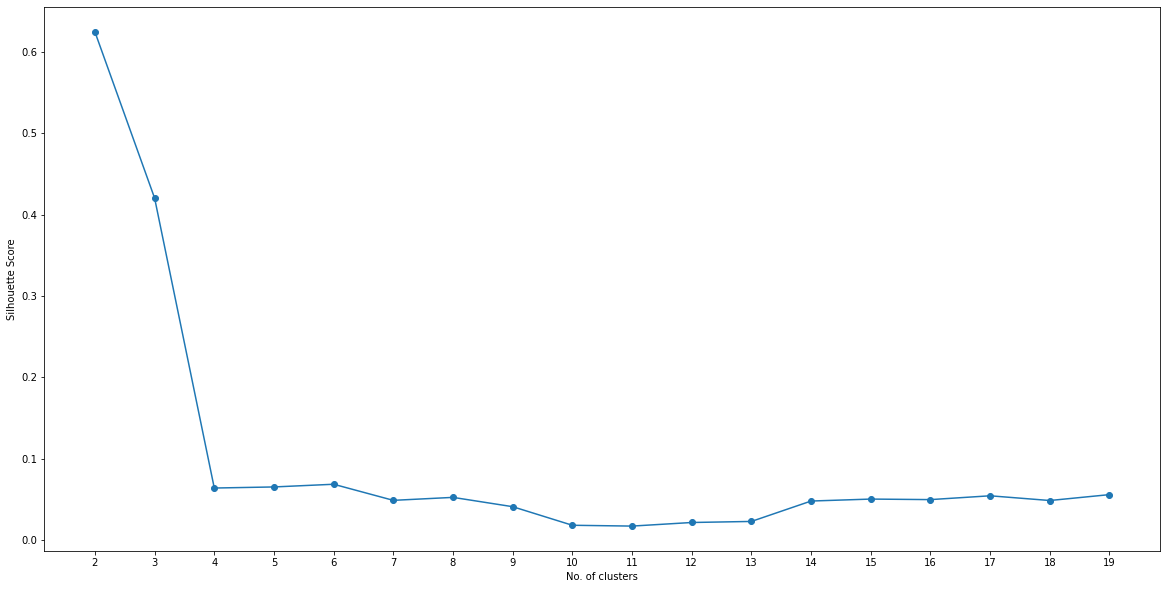

In [83]:

plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [86]:
opt = np.argmax(scores)+2 # Finds the optimal value
opt

2

In [89]:

Mclusters = opt

# Run k-means clustering
Mgc = Mumbai_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(kgc)

In [90]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [92]:
Mumbai_merged = df
Mumbai_merged = Mumbai_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
Mumbai_merged.dropna(inplace = True)
Mumbai_merged['Cluster Labels'] = Mumbai_merged['Cluster Labels'].astype(int)
Mumbai_merged.head()

,Neighbourhood,Co-ordinates,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Forest,"(Aarey, Western Express Highway, Goregaon East, P/S Ward, Zone 4, Mumbai, Mumbai Suburban, Maharashtra, 400063, India, (19.1674838, 72.8586643))",19.167484,72.858664,1,Fast Food Restaurant,Hotel,Vegetarian / Vegan Restaurant,Multiplex,Bookstore,Donut Shop,Indian Restaurant,Italian Restaurant,Bistro,Farm
1,Agripada,"(Agripada, Byculla West, E Ward, Zone 1, Mumbai, Mumbai City, Maharashtra, 400027, India, (18.9753024, 72.8248975))",18.975302,72.824898,1,Indian Restaurant,Fast Food Restaurant,Department Store,Coffee Shop,Bakery,Gym,Ice Cream Shop,Movie Theater,Pizza Place,Platform
2,Altamount Road,"(Altamount Road, Blairgowrie, Blairgowrie and Rattray, Perth and Kinross, Scotland, PH10 6QL, United Kingdom, (56.5846468, -3.3369125))",56.584647,-3.336912,1,Grocery Store,Hotel,Farm,Pub,Seafood Restaurant,Supermarket,Bed & Breakfast,Food Court,Food,Flower Shop
3,"Amboli, Mumbai","(Hindu Friends Society Marg, Jogeshwari West, K/W Ward, Zone 3, Mumbai, Mumbai Suburban, Maharashtra, 400069, India, (19.1279315, 72.8477355))",19.127931,72.847735,1,Bakery,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Gym,Bike Rental / Bike Share,Bowling Alley,Falafel Restaurant,Chinese Restaurant,Athletics & Sports
4,Amrut Nagar,"(Amrut Nagar, Thane, Maharashtra, 400612, India, (19.1741818, 73.0204924))",19.174182,73.020492,1,Playground,Candy Store,Asian Restaurant,Convenience Store,Restaurant,Chinese Restaurant,Fast Food Restaurant,Food Truck,Food Court,Food


## Map of Mumbai Neighbourhood with Particular Venues Nearby

In [97]:
# Create map
map_clusters = folium.Map(location=[Mum_lat, Mum_lng], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(Mclusters)
ys = [i + x + (i*x)**2 for i in range(Mclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Mumbai_merged['Lat'],Mumbai_merged['Lon'],Mumbai_merged['Neighbourhood'], Mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [95]:

val = 14
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == (val - 1), Mumbai_merged.columns[[0] + np.arange(4, Mumbai_merged.shape[1]).tolist()]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [96]:
Mumbai_merged.head()

,Neighbourhood,Co-ordinates,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Forest,"(Aarey, Western Express Highway, Goregaon East, P/S Ward, Zone 4, Mumbai, Mumbai Suburban, Maharashtra, 400063, India, (19.1674838, 72.8586643))",19.167484,72.858664,1,Fast Food Restaurant,Hotel,Vegetarian / Vegan Restaurant,Multiplex,Bookstore,Donut Shop,Indian Restaurant,Italian Restaurant,Bistro,Farm
1,Agripada,"(Agripada, Byculla West, E Ward, Zone 1, Mumbai, Mumbai City, Maharashtra, 400027, India, (18.9753024, 72.8248975))",18.975302,72.824898,1,Indian Restaurant,Fast Food Restaurant,Department Store,Coffee Shop,Bakery,Gym,Ice Cream Shop,Movie Theater,Pizza Place,Platform
2,Altamount Road,"(Altamount Road, Blairgowrie, Blairgowrie and Rattray, Perth and Kinross, Scotland, PH10 6QL, United Kingdom, (56.5846468, -3.3369125))",56.584647,-3.336912,1,Grocery Store,Hotel,Farm,Pub,Seafood Restaurant,Supermarket,Bed & Breakfast,Food Court,Food,Flower Shop
3,"Amboli, Mumbai","(Hindu Friends Society Marg, Jogeshwari West, K/W Ward, Zone 3, Mumbai, Mumbai Suburban, Maharashtra, 400069, India, (19.1279315, 72.8477355))",19.127931,72.847735,1,Bakery,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Gym,Bike Rental / Bike Share,Bowling Alley,Falafel Restaurant,Chinese Restaurant,Athletics & Sports
4,Amrut Nagar,"(Amrut Nagar, Thane, Maharashtra, 400612, India, (19.1741818, 73.0204924))",19.174182,73.020492,1,Playground,Candy Store,Asian Restaurant,Convenience Store,Restaurant,Chinese Restaurant,Fast Food Restaurant,Food Truck,Food Court,Food


## Results and Discussion <a name="results"></a>

 After plotting the graph we have finalized the top most 10 venues nearby a  particular areas in Mumbai ,that would help all the peoples living nearby to find the accurate place to take a house and start making use of amenities nearby 

New Builders can also have an idea about the most common places nearby the area and plan accordingly to work on place development and  ameneties


## Conclusion <a name="conclusion"></a>

In this study, I analysed the nearby locations of places in Mumbai and I found out top 10 most visited venues nearby 
So that it could help the peoples living nearby as well as the peoples want to start new business but not sure in which area which these study they can be more accurate on shortlisting there idea of business on based of most famous places and visiting places near by the areas in Mumbai
